In [68]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [254]:
# fashion_mnist, mnist, cifar10
((x_train, y_train), (x_test, y_test)) = tf.keras.datasets.cifar100.load_data()

In [253]:
x_train.shape, x_test.shape, y_train.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

In [255]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [256]:
flattend_image_size = np.prod(x_train.shape[1:])
x_train_reshaped = x_train.reshape(-1, flattend_image_size)
x_test_reshaped = x_test.reshape(-1, flattend_image_size)

In [257]:
flattend_image_size

3072

In [260]:
from collections import Counter
dist_classes = Counter(y_train)


In [261]:
n_classes = len(dist_classes)
n_classes

100

In [265]:
x_train[1].shape

(32, 32, 3)

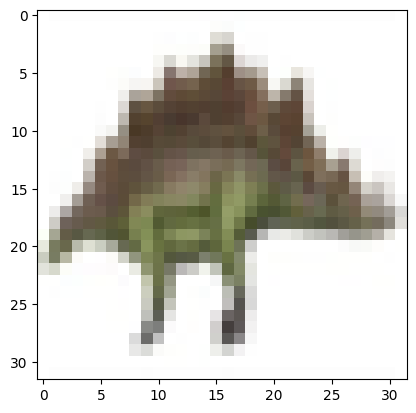

In [266]:
plt.imshow(x_train[1].astype(int))

In [267]:
%%time
classes_vectors = np.zeros((n_classes, flattend_image_size))
threshold = 250
for vector, image_class in zip(x_train_reshaped, y_train):
    classes_vectors[image_class] = classes_vectors[image_class] + vector #+ vector*(vector > threshold)

CPU times: user 531 ms, sys: 18.2 ms, total: 549 ms
Wall time: 608 ms


In [268]:
x_train_reshaped[y_train == 1].mean(axis=0).shape

(3072,)

In [269]:
%%time
classes_vectors = np.zeros((n_classes, flattend_image_size))
for image_class in range(n_classes):
    classes_vectors[image_class] = x_train_reshaped[y_train == image_class].mean(axis=0)
    classes_vectors[image_class] = classes_vectors[image_class]/np.linalg.norm(classes_vectors[image_class])

CPU times: user 202 ms, sys: 5.58 ms, total: 208 ms
Wall time: 217 ms


In [270]:
%%time
predicted_classes = []
for image_to_eval in x_test:
    dot_products = []
    for class_vector in classes_vectors:
        dot_products.append(class_vector.dot(image_to_eval.reshape(-1)))
    predicted_class = np.array(dot_products).argmax()
    predicted_classes.append(predicted_class)

CPU times: user 15.5 s, sys: 216 ms, total: 15.8 s
Wall time: 16.2 s


In [271]:
(np.array(predicted_classes) == y_test).sum()/len(x_test)

0.1183

In [275]:
%%time
predicted_classes = x_test_reshaped.dot(classes_vectors.T).argmax(axis=1)

CPU times: user 1.42 s, sys: 167 ms, total: 1.58 s
Wall time: 379 ms


In [276]:
(predicted_classes == y_test).sum()/len(x_test)

0.1183

In [277]:
classes_vectors[image_class]

array([0.01757989, 0.01809837, 0.01741069, ..., 0.01728357, 0.01771502,
       0.01712182])

In [279]:
# plt.imshow(classes_vectors[2].reshape(28, 28), cmap='gray')